###Лабораторная №1-2

Описание датасета:
Набор данных расположения пальцев для аккордов гитары.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv("guitar_chords.csv", sep=";", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("guitar_chords.csv", sep=";", encoding='latin1')

В нашем датасете, состоящем из 2632 записей, существуют поля "CHORD_ROOT" - основной тон аккорда, "CHORD_TYPE" - тип аккорда, "CHORD_STRUCTURE" - аккордовая структура, "FINGER_POSITIONS" - расположение пальцев, "NOTE_NAMES" - названия нот.

In [ ]:
print(df.head(1))

  CHORD_ROOT CHORD_TYPE   CHORD_STRUCTURE FINGER_POSITIONS        NOTE_NAMES
0         A#         13  1;3;5;b7;9;11;13      x,1,0,2,3,4  A#,C##,G#,B#,F##


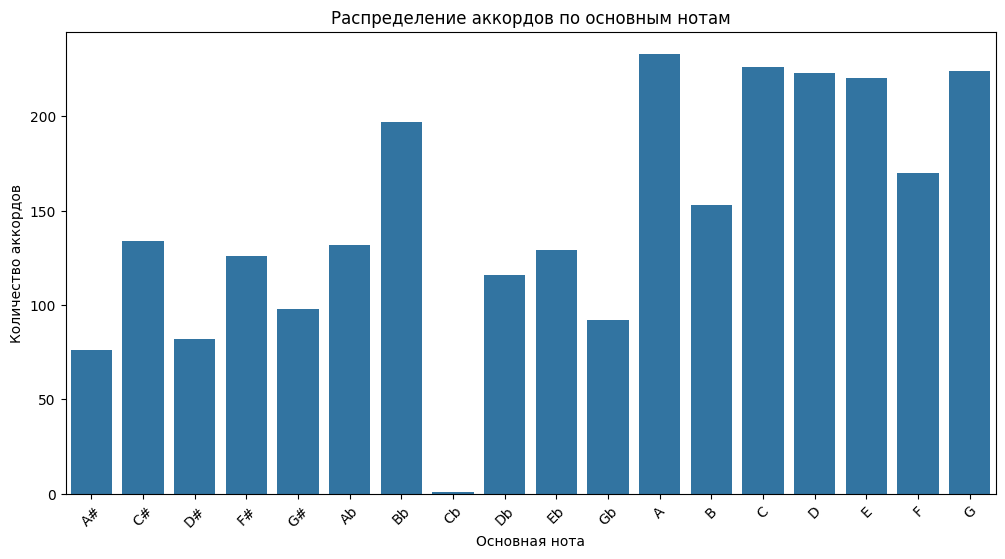

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CHORD_ROOT')
plt.title('Распределение аккордов по основным нотам')
plt.xlabel('Основная нота')
plt.ylabel('Количество аккордов')
plt.xticks(rotation=45)
plt.show()

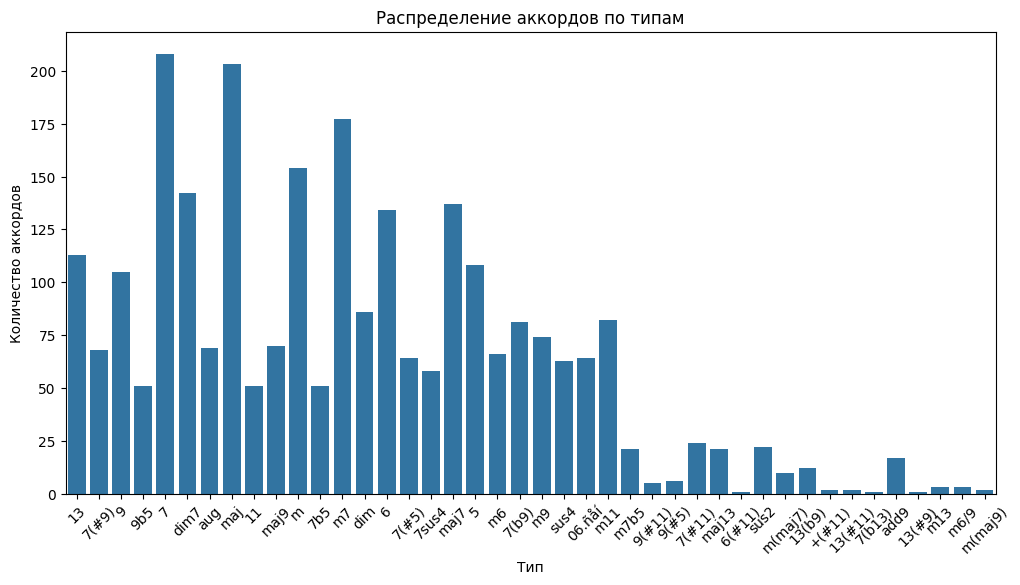

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CHORD_TYPE')
plt.title('Распределение аккордов по типам')
plt.xlabel('Тип')
plt.ylabel('Количество аккордов')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['CHORD_STRUCTURE_COUNT'] = df['CHORD_STRUCTURE'].apply(lambda x: x.count(';')+1 if pd.notnull(x) else 0)

In [ ]:
print(df[['CHORD_STRUCTURE', 'CHORD_STRUCTURE_COUNT']].head())

    CHORD_STRUCTURE  CHORD_STRUCTURE_COUNT
0  1;3;5;b7;9;11;13                      7
1  1;3;5;b7;9;11;13                      7
2  1;3;5;b7;9;11;13                      7
3       1;3;5;b7;#9                      5
4       1;3;5;b7;#9                      5


In [ ]:
df['NOTE_NAMES_COUNT'] = df['NOTE_NAMES'].apply(lambda x: x.count(',')+1 if pd.notnull(x) else 0)

In [ ]:
print(df[['NOTE_NAMES', 'NOTE_NAMES_COUNT']].head(10))

            NOTE_NAMES  NOTE_NAMES_COUNT
0     A#,C##,G#,B#,F##                 5
1     A#,G#,B#,C##,F##                 5
2     A#,G#,C##,F##,B#                 5
3     A#,C##,G#,B##,E#                 5
4     A#,C##,G#,B##,E#                 5
5  A#,E#,G#,C##,E#,B##                 6
6         A#,C##,G#,B#                 4
7         C##,G#,B#,E#                 4
8      A#,G#,C##,E#,B#                 5
9     E,A#,C##,G#,B#,E                 6


In [ ]:
df['FINGER_COUNT'] = df['FINGER_POSITIONS'].apply(lambda x: 6 - x.count('x') if pd.notnull(x) else 0)

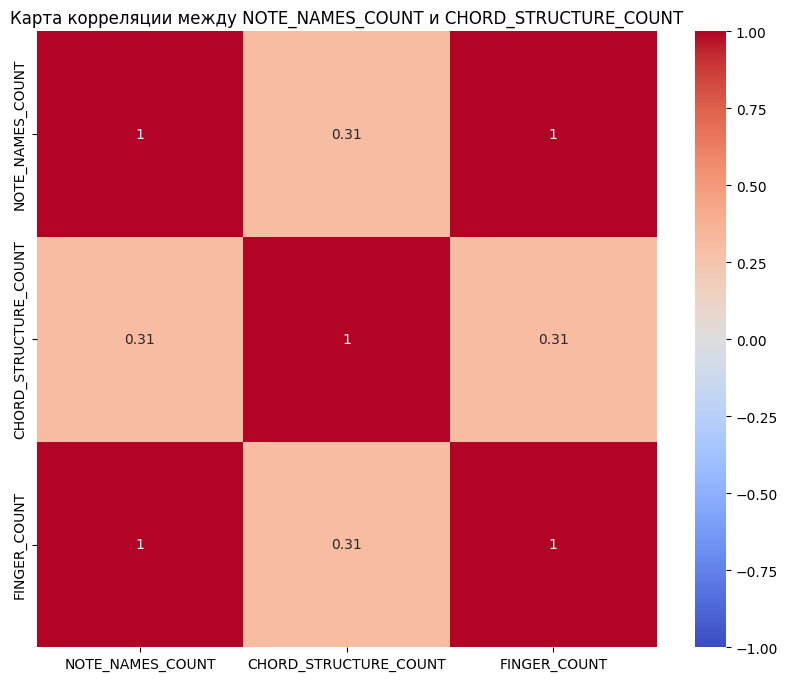

In [ ]:
corr = df[['NOTE_NAMES_COUNT', 'CHORD_STRUCTURE_COUNT', 'FINGER_COUNT']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Карта корреляции между NOTE_NAMES_COUNT и CHORD_STRUCTURE_COUNT')
plt.show()

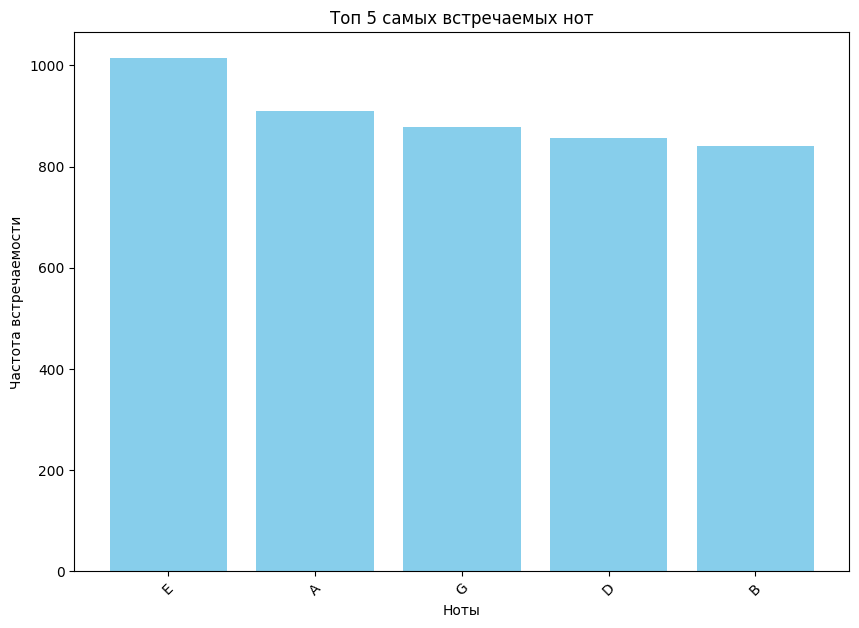

In [ ]:
from collections import Counter
all_notes = df['NOTE_NAMES'].str.split(',').sum()
note_counts = Counter(all_notes)
top_notes = note_counts.most_common(5)
notes, counts = zip(*top_notes)
plt.figure(figsize=(10, 7))
plt.bar(notes, counts, color='skyblue')
plt.xlabel('Ноты')
plt.ylabel('Частота встречаемости')
plt.title('Топ 5 самых встречаемых нот')
plt.xticks(rotation=45)
plt.show()

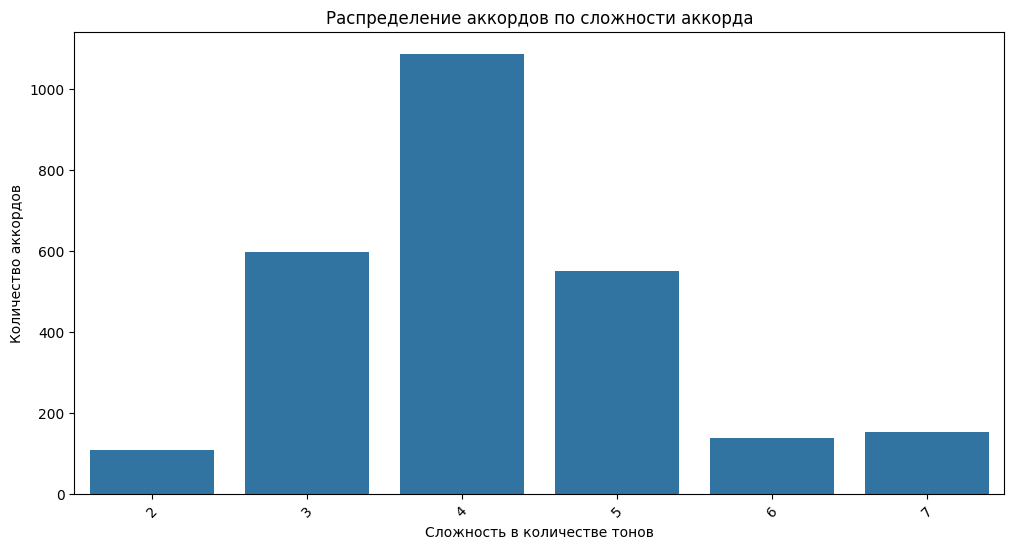

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CHORD_STRUCTURE_COUNT')
plt.title('Распределение аккордов по сложности аккорда')
plt.xlabel('Сложность в количестве тонов')
plt.ylabel('Количество аккордов')
plt.xticks(rotation=45)
plt.show()

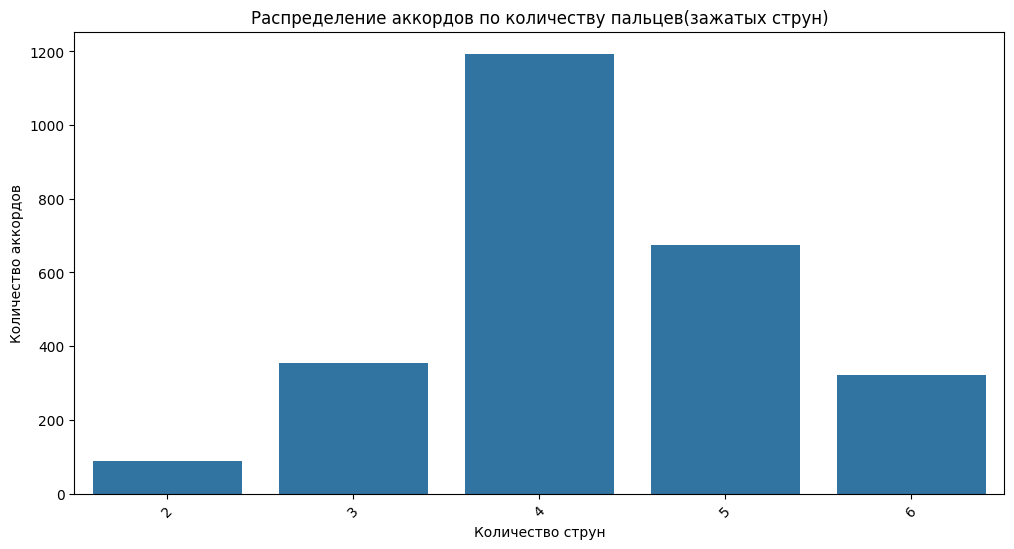

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FINGER_COUNT')
plt.title('Распределение аккордов по количеству пальцев(зажатых струн)')
plt.xlabel('Количество струн')
plt.ylabel('Количество аккордов')
plt.xticks(rotation=45)
plt.show()